# url: https://toukei-lab.com/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%BC%E5%88%86%E6%9E%90

# 【5分で分かる】クラスター分析のPythonとRでの実装方法を見ていこう！

大量のデータセットをいくつかのグループ・セグメントに分けたい！

そんな時は「クラスター分析」！

クラスター分析は、非常に便利で様々な場面でよく使われますので覚えておきましょう！

この記事では、そんなクラスター分析についてまとめていきます。

解析手法には教師あり学習と教師なし学習があるのですが、クラスター分析はどちらでしょうか？

教師あり学習というのは、どのグループに属するかという”ラベル”がついている既知データが手元にあり、それを用いてモデルを作って、”ラベル”がついていないデータの分類に用いるという手法。

ただ、教師あり学習は、「これはここに入るんだよ～」と丁寧に教えてくれる教師がいる状態じゃないと解析できないんですね！

教師なし学習は、ラベル付きデータがない状態であるデータを分類するような手法。

「これはここに入るんだよ～」と丁寧に教えてくれる教師がいなくても解析できる！優秀な手法です！

さて、もう一度！

クラスター分析は教師あり学習手法でしょうか、教師なし学習でしょうか？

クラスター分析は・・・

    教師なし学習！

教師あり学習にはランダムフォレスト・SVMなど強力な手法が強いですが、既知の学習データがないような状況では解析できないので注意が必要ですね！

クラスター分析を始めとする教師なし学習は既知の学習データがなくても使えるので最終アウトプットへの橋渡しとして多く用いられています。

それでは早速クラスター分析について見ていきましょう！

## クラスター分析の種類
クラスター分析と一口に言っても階層的クラスター分析と非階層的クラスター分析があります。

一般的に最初に勉強するのは階層的クラスター分析。

階層的クラスター分析のことを単純にクラスター分析と呼んでいる例もあります。

それぞれの特徴について見ていきましょう！

## 階層的クラスター分析

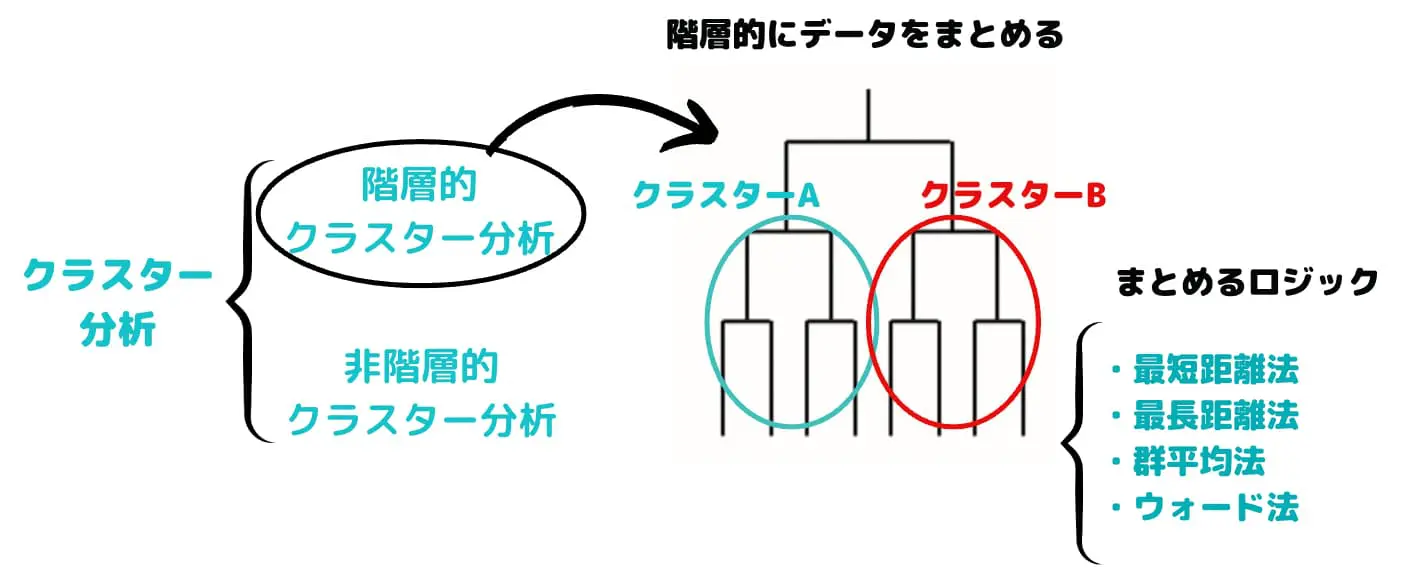

階層クラスター分析では木構造のような図を作ってクラスター分けを行います。

ある類似度を表す指標をもとにサンプルを融合していき、最終的に一つのクラスターを作る手法です。

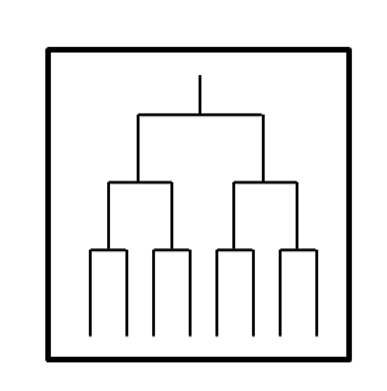

簡易的な図ですが、こんな感じの木を描いて分類していきます。

この時、どこで切るかによってクラスターの数が変わるのがお分かりでしょうか？

このように階層的クラスター分析では木構造を作った後にどこで切るかを考えクラスターの数を決めます。

1. 手順１：変数を用いて個々の対象間の距離をすべて計算し、その中で距離が最も短い対象同士を併合して最初のクラスターを作成する。

2. 手順２：新しく併合されたクラスターと他の対象間の距離を再度計算し、手順1で計算された対象間の距離を含めて最も近いものを併合する。その際、新しく併合されたクラスターと対象間、および、クラスター間の距離の定義にはさまざまな方法が提案されているが、それは後ほど紹介する。

3. 手順３：手順2をくり返し、すべてのクラスターが統合されるまで計算を行う。

4. 手順４：計算結果を用いて、クラスターの併合される過程を表すデンドログラム（さっきの木構造みたいなやつ）を描く。

この手法は、N個の対象からなるデータが与えられたとき、1個の対象だけを含む N個のクラスターがある初期状態をまず作る。

この状態から始めて、対象 x1とx2の間の距離 d(x1, x2) からクラスター間の距離 d(C1, C2)を計算し、最もこの距離の近い二つのクラスターを逐次的に併合する。

そして、この併合を全ての対象が一つのクラスターに併合されるまで繰り返すことで階層構造を獲得する。

クラスターC1とC2の距離関数 d(C1, C2)の違いにより以下のような手法がある。

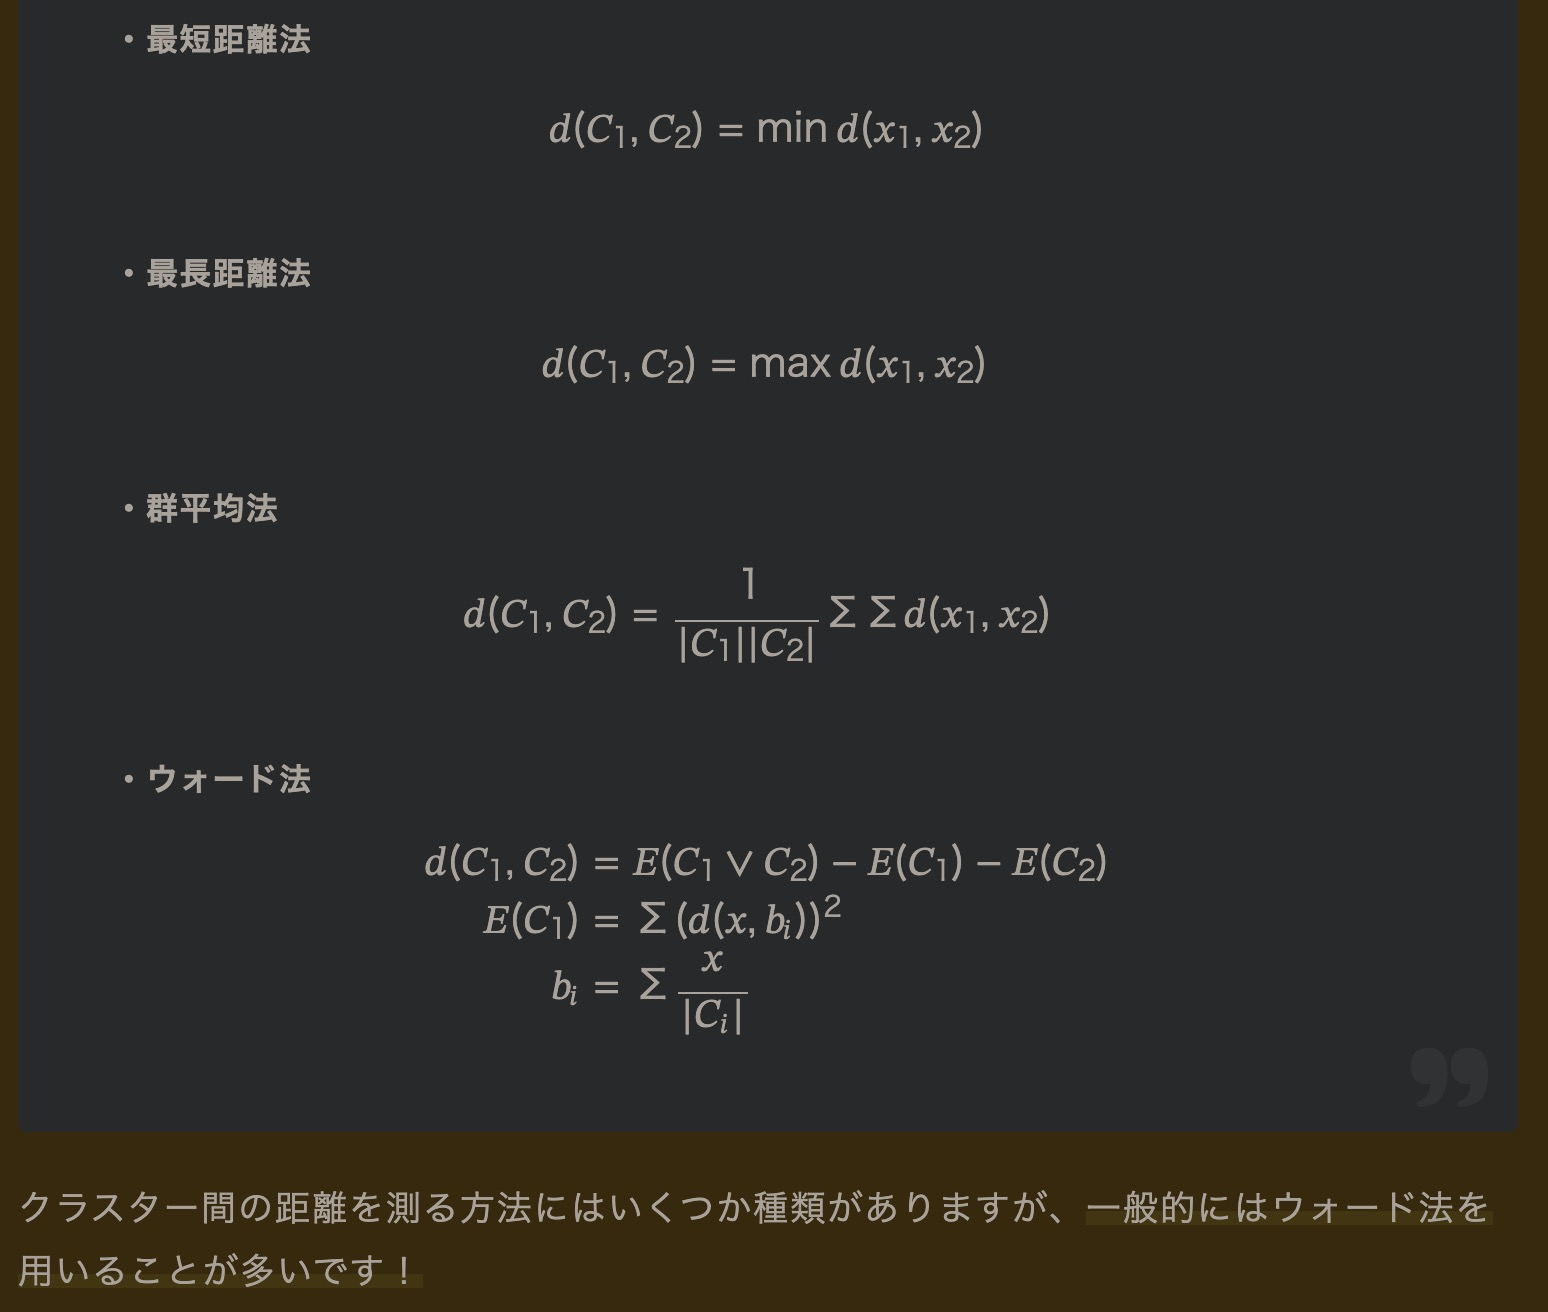

どうしてウォード法を用いることが多いの？

それは「鎖効果」が起きにくいからなんだ！気になった人は調べてみよう！

---

「鎖効果」（chaining effect）は、クラスタリングの手法であるk-means法において、異なるクラスタが連鎖的に影響を受ける現象を指します。ウォード法（Ward's method）は、クラスタリングにおいて鎖効果が起きにくいとされ、そのためk-means法と組み合わせて使われることがあります。

具体的な説明を行いますが、まず、k-means法の基本的なアプローチを振り返りましょう。k-means法は、各データポイントを最も近いクラスタ中心に割り当て、その後クラスタ中心を更新するというプロセスを繰り返します。この手法は、クラスタ内のデータポイント同士が相互に影響を与えないようにすることが理想的です。

しかし、k-means法は初期のクラスタ中心の選び方に依存するため、異なる初期値を選ぶと異なる結果が得られることがあります。ウォード法は、クラスタ内の分散や距離の変動を最小化するようにクラスタを結合する方法であり、この特性が鎖効果を抑制する一因とされています。

具体的なメカニズムとして、ウォード法では、各クラスタが結合されたときのクラスタ内の分散の増加を考慮してクラスタを結合します。これにより、クラスタが連鎖的に結合されることが抑制され、異なる初期値に対しても安定したクラスタリング結果が得られる可能性が高まります。

要するに、鎖効果は初期化の影響を受けやすい問題であり、ウォード法はこの問題に対処する効果が期待されています。ただし、最適な手法は問題によって異なるため、実際のデータセットにおいては異なる手法や初期化方法を試すことが一般的です。

---

階層型クラスタリング(ウォード法、群平均法など)の計算過程

url: https://analysis-navi.com/?p=1805#google_vignette

クラスター分析（階層型分類法の基本事項）

url: https://www.goodnalife.com/entry/2021/06/13/080000#google_vignette

# 非階層的クラスター分析

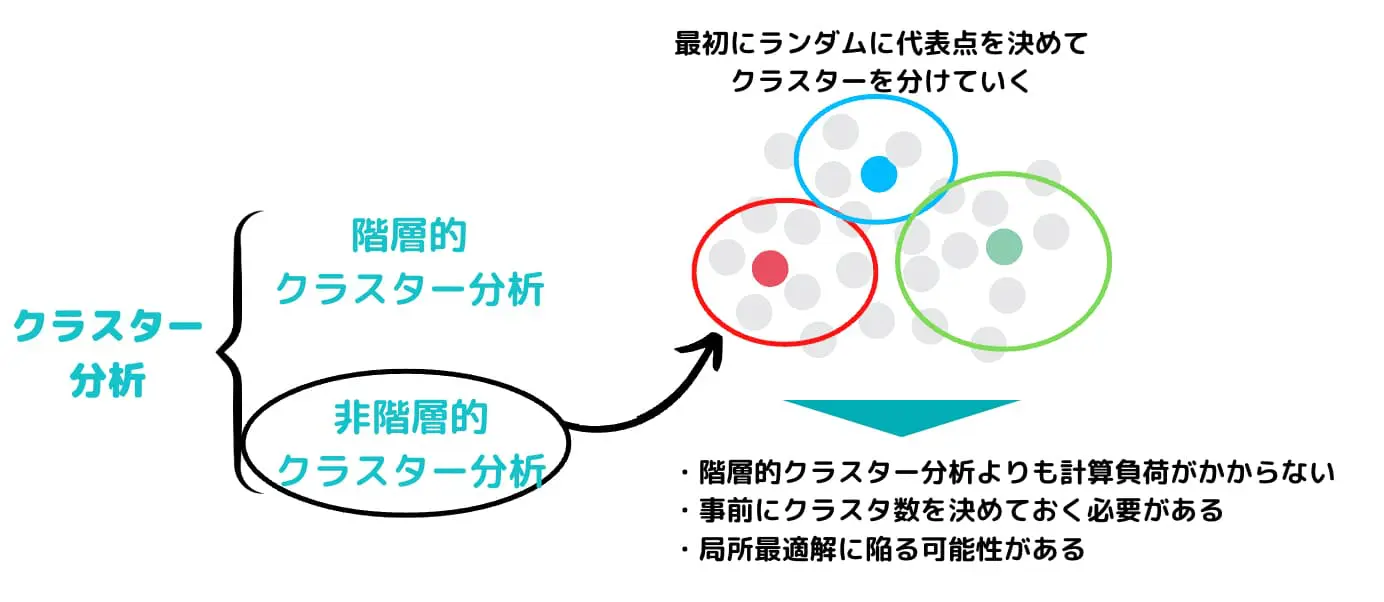

続いて、非階層的クラスター分析を見ていきましょう！

非階層的クラスター分析は、その名の通り階層構造を作りません。

階層的クラスタリングと異なり、階層的な構造を持たず、あらかじめいくつのクラスターに分けるかを決め、決めた数の塊にサンプルを分割する方法です。

非階層的クラスター分析では、分割の良さの評価関数を定め、その評価関数を最適にする分割を探索します。

可能な分割の総数は指数的に増えていくので、実際は準最適解を求めることになります。

その中でも代表的なものがk-means法です。

簡単なアルゴリズムは以下の通りです。

    1.代表点を適当に決める
    2.ユークリッド距離をもとにデータを代表点を持つクラスタに割り当て
    3.クラスタの重心点を代表点とする
    4.代表点が変わらなければ終了。変われば2へ

---
局所最適解とはなに?

局所最適解（local optimum）は、最適化問題において、解空間内でのある点がその近傍の他の点よりも優れた解である場合に言います。言い換えれば、その点において目的関数の値が最小または最大になっている状態を指しますが、その点の近傍に他にもっと優れた解が存在する可能性があります。

最適化問題では、解の探索を行う際に様々な手法が利用されますが、その中には初期値の選び方や探索方針に依存して特定の解に収束しやすいという性質があります。このような場合、解空間内で局所最適解に収束してしまうことがあります。

例えば、勾配降下法などの最適化アルゴリズムは、初期値に依存して収束する先が変わります。局所最適解に収束してしまうと、それが全体の最適解でない可能性があります。これが問題の非凸性や非線形性に起因するもので、特に複雑な問題では全体の最適解を見つけることが難しい場合があります。

対照的に、全体の最適解を指す用語として「大域最適解（global optimum）」があります。大域最適解は、解空間全体で最も優れた解である点を指します。問題によっては、局所最適解と大域最適解が一致する場合もありますが、複雑な問題ではその保証がないことがあります。

---

つまり大域最適解は局所最適解を内包していて、局所最適解は部分的な最適解という認識でいいんでしょ?

はい、正確です。大域最適解は、解空間全体で最も優れた解を指し、その中に局所最適解も含まれる可能性があります。局所最適解は、特定の点や近傍で最適であるが、それが全体の最適解であるかどうかは保証されません。

イメージとしては、大域最適解は全体の山の頂点に相当し、局所最適解はその山の一部の頂点に相当します。大域最適解が局所最適解を内包しているケースでは、問題の性質によっては、局所最適解が同時に大域最適解となることもあります。

特に非凸最適化問題では、複数の局所最適解が存在し、それらが同時に大域最適解となることは少ないですが、問題によってはそのような特殊なケースもあります。一般に、最適化問題では解の探索が難しく、特に多次元で非線形な問題では、全体の最適解を見つけることが難しい場合があります。

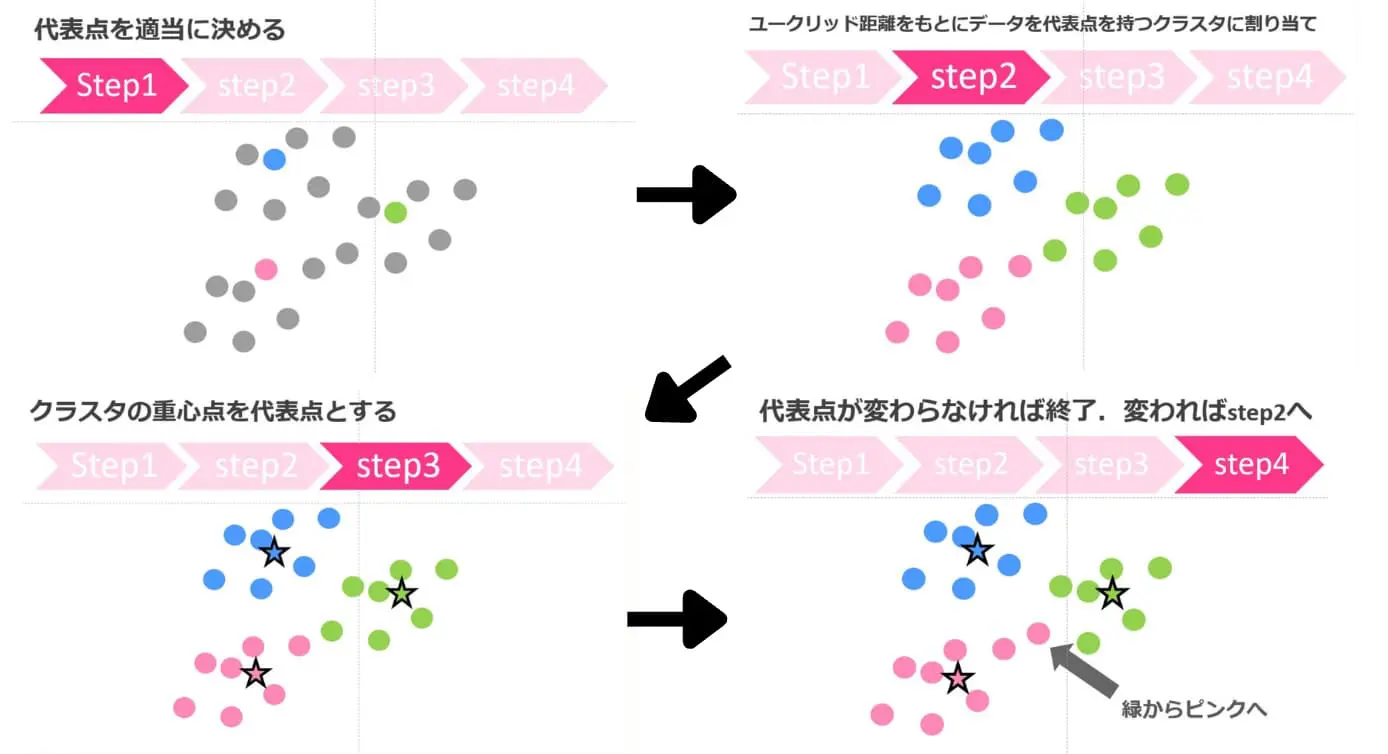

非階層的クラスター分析は、あらかじめクラスタ数を与える必要がありますが、計算スピードが速いです。

k-means法に関して詳しくはこちらにまとめています！

## 非階層的クラスターと階層的クラスターの違い

階層的クラスター分析の方が、視覚的に分かりやすく、なぜそのクラスタ数に分けたのかが説明しやすいです。

しかし、データ数が膨大になると非常に計算負荷がかかってしまうのでビックデータを扱う上ではあまりオススメしません。

結局クラスター分析は、何かしらの特徴を基にデータをグループに分けてくれるだけです。それらのグループに意味を与えるのはマーケターの仕事です。

非階層的クラスター分析を行う場合は、当たりを付けてクラスタ数を動かしながら最適なグループ分けを見つけると良いでしょう。

ちなみに最適なクラスタ数を与えてくれる非階層的クラスター分析「x-means法」という手法も存在しますが、高度なのでここでは省略します。

ベイズ情報量基準（BIC)を基に最適なクラスタ数を算出してくれます。

使った感想としては、必ずしも最適なクラスタを算出してくれるとは限らないイメージです。

k-means法を使いながらクラスタ数をチューニングしていった方が手間はかかりますが、最適なクラスタが見つかります。

興味のある方は調べてみると良いでしょう！

# pythonで実装

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
pred_cluster = KMeans(n_clusters=3).fit_predict(df)
df['cluster'] = pred_cluster

display(confusion_matrix(iris.target,pred_cluster))
display(accuracy_score(iris.target, pred_cluster)) #これが正解率

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

0.8933333333333333

# ビジネスで活かす場面

さて、クラスター分析の種類や仕組み・そしてRでの実装について分かったところでどのようにビジネスに活かしていけばよいのか見ていきましょう！

ここでは2つの観点でクラスター分析の使いどころを見ていきます。

    ・セグメントの可視化
    ・教師あり学習の特徴量生成

## セグメントの可視化

もう既にお分かりの通り、クラスター分析を使えばお客さんの行動データや属性データを基にいくつかのセグメントに分けることができます。

あるセグメントは、年配の女性で購入金額が高い層

もう一方のセグメントは、若い男性で購入金額が低い層、などが考えれます。

この2つのセグメントに対して行うコミュニケーションは変えるべきだということが分かりますね。

このように、セグメントの可視化を行いセグメントのユーザー像を明確にすることで、マーケティング活動を効率化することが可能になります。

このセグメントの可視化においてユーザー像を想像するのはマーケターの腕の見せ所で、クラスター数を変化させてどのようなセグメント定義であれば最適なコミュニケーション設計ができるのか考えていくことになります。

# 教師あり学習の特徴量生成

先ほども紹介しましたが、教師あり学習というのは正解が紐づいているデータを学習する手法のことを指しましたね。

教師あり学習を使うと、過去の顧客の購買という正解データから未来の購買を予測することが可能です。

そんな、顧客の購買を予測するときにクラスター分析で得られたクラスターを特徴量として新たに追加して使うことがあります。

これによりインプットされるデータがリッチになって、他の特徴量で表現できなかったことが表現できるようになる可能性があります。

つまりクラスター分析によって生成された特徴量を使って顧客の購買予測精度の向上が見込めるんです。

特徴量に関するテクニックは以下の記事で詳しくまとめています！

url: https://toukei-lab.com/variable-engineering#google_vignette

効果が本当に見込めるかどうかはデータによりますが、精度を向上させる手段として覚えておくとよいでしょう！

1つ目の可視化に関しては現状を把握することに重きが置かれていましたが、2つ目では予測の精度を高めるための1つの情報として使われました。

どちらもやっていることはさほど変わらないのですが、クラスター分析には色々な使い方があるということは理解しておきましょう。

## クラスター分析　まとめ

クラスター分析は多くの場面で使用できる汎用性の高い手法なんです。

最後にクラスター分析についてまとめておきましょう！

    ・クラスター分析はデータをグループ分けする手法
    ・クラスター分析には階層的クラスター分析と非階層的クラスター分析がある
    ・データ量が多いときは非階層的クラスター分析の方がオススメだけど、あらかじめクラスタ数を決めておく必要がある

是非クラスター分析を使ってみてください！

何の変哲もないデータにクラスター分析をかけることで洞察を得ることができるかもしれませんよー！